# Prediction of online shoppers chances of purchase

we set out to create find the best algorithm that predicts the chances of purchase by online shoppers in an online store.
In order to run the process smoothly, xgboost and shap libraries were installed

#### Necessary Library Imports
Pandas
Numpy
Matplotlib
Seaborn
Scikit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler # to help oversample train set & prevent bias
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import shap
shap.initjs()
import warnings
warnings.filterwarnings("ignore")

## Data Preview and Preprocessing

In [2]:
# import dataset
df = pd.read_csv("online_shoppers_intention.csv")
cols = df.columns
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Reviewing the data summary information to check for missing values and gain insights on the different data types contained in our data

In [3]:
print("total number of rows and columns are: ", df.shape)
print(df.isnull().sum())  # checking if there is any null data
df.info()  # this shows that there are no missing data from any column.

total number of rows and columns are:  (12330, 18)
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330

In [4]:
# get the unique values for class/ TARGET VARIABLE
df["Revenue"].unique()

array([False,  True])

Based on the summary information reviewed, Below were our data has no missing values. Thus, no data cleaning process was required at this stage.

Also, the target variable (Revenue) has a two unique values making me decide to use binary classification methods for this project.

### Univariate Analysis

Here,I analysed and Visualised my data and its distribution based on Revenue, Visitor Type, Weekend and Month

#### Revenue

False    10422
True      1908
Name: Revenue, dtype: int64


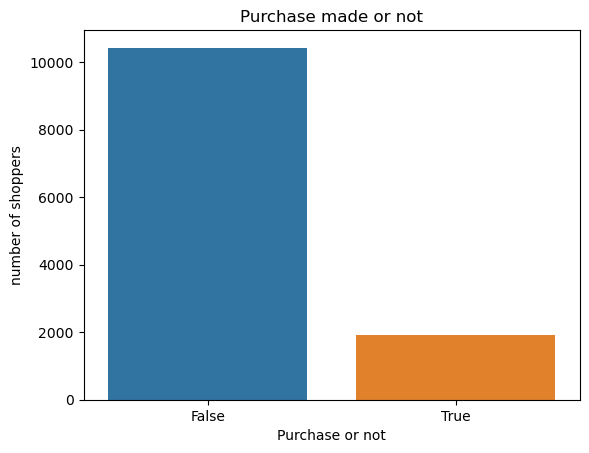

In [5]:
print(df['Revenue'].value_counts())

# plotting to visualize distribution
sns.countplot(df['Revenue'])
plt.title('Purchase made or not')
plt.xlabel('Purchase or not')
plt.ylabel('number of shoppers')
plt.show()

#### Visitor Type

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


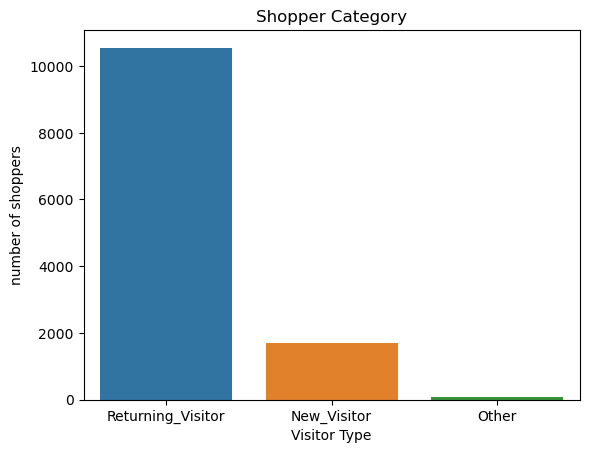

In [6]:
print(df['VisitorType'].value_counts())

# plotting to visualize distribution
sns.countplot(df['VisitorType'])
plt.title('Shopper Category')
plt.xlabel('Visitor Type')
plt.ylabel('number of shoppers')
plt.show()

#### Weekend Shoppers

False    9462
True     2868
Name: Weekend, dtype: int64


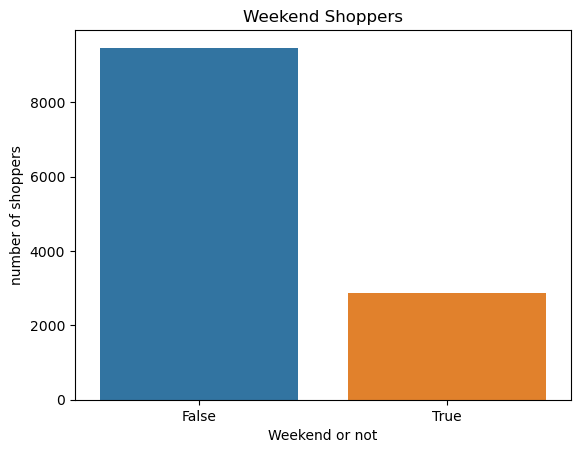

In [7]:
print(df['Weekend'].value_counts())

# plotting to visualize distribution
sns.countplot(df['Weekend'])
plt.title('Weekend Shoppers')
plt.xlabel('Weekend or not')
plt.ylabel('number of shoppers')
plt.show()

#### Shoppers Distribution by Month

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


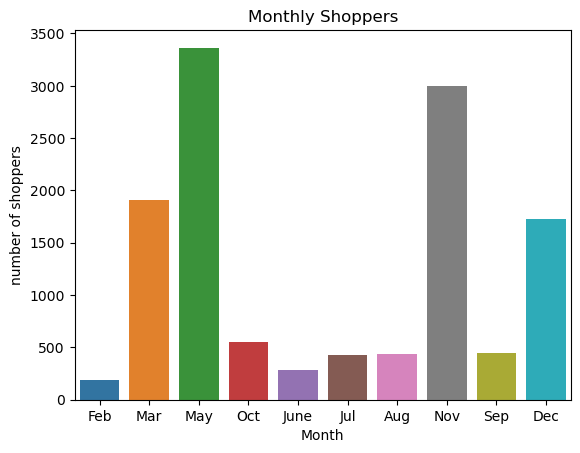

In [8]:
print(df['Month'].value_counts())

# plotting to visualize distribution
sns.countplot(df['Month'])
plt.title('Monthly Shoppers')
plt.xlabel('Month')
plt.ylabel('number of shoppers')
plt.show()

#### Univariate Analysis - Summary and Observation

1. Significantly more shoppers did not make a purchase than those who did.
2. Majority of the shoppers are returning visitors than others. This is useful in marketing and campaign.
3. There are more shoppers during weekdays than weekends. This may be important in comparing online shop engagement on daily average. Also, one can consider that weekend is 2 days against 5 weekdays.
4. May And November had more shoppers on the online store than other months while February and June had the least shoppers. This is important in understanding which months to focus more promotional contents to boost engagement and sales.
5. January and April were not accounted for in this data.

Worthy of note also during the Univariate Analysis is that some classes contained imbalanced data. This will affect our algorithms and can create Bias or misleading results.

### BiVariate Analysis -  Visualizing the following features against Revenue
- ProductRelated Duration
- Bounce rate
- Administrative Duration
- VisitorType
- Page Values

#### Administrative Duration against Revenue

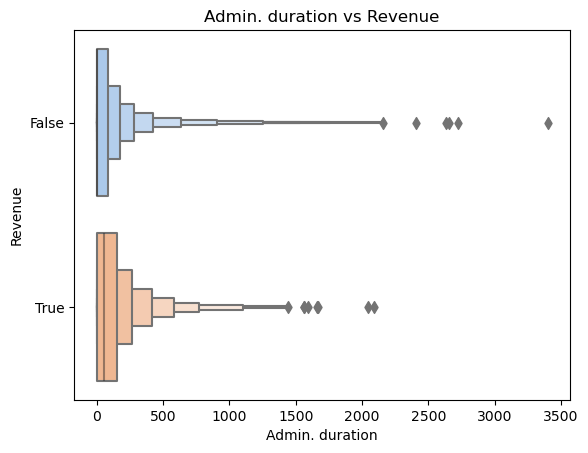

In [9]:
# plotting to visualize distribution
sns.boxenplot(df['Administrative_Duration'], df['Revenue'], palette = 'pastel', orient='h')
plt.title('Admin. duration vs Revenue')
plt.xlabel('Admin. duration')
plt.ylabel('Revenue')
plt.show()

#### ProductRelated Duration against Revenue

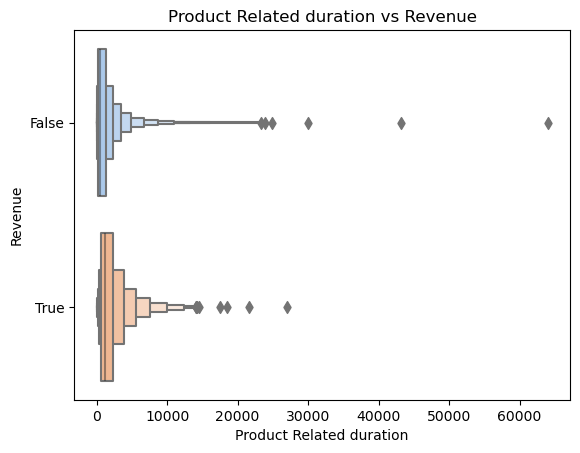

In [10]:
# plotting to visualize distribution
sns.boxenplot(df['ProductRelated_Duration'], df['Revenue'], palette = 'pastel', orient='h')
plt.title('Product Related duration vs Revenue')
plt.xlabel('Product Related duration')
plt.ylabel('Revenue')
plt.show()

#### VisitorType Duration against Revenue

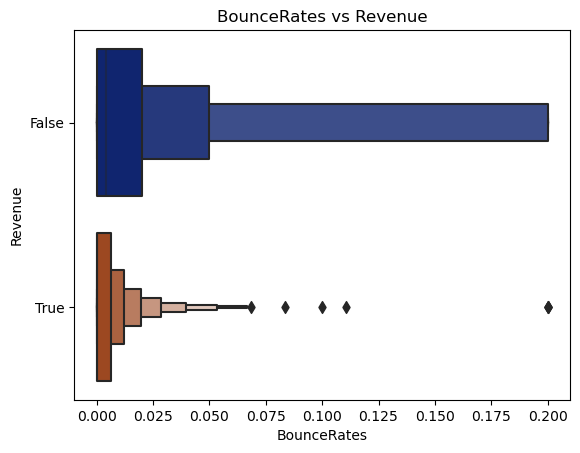

In [11]:
# plotting to visualize distribution
sns.boxenplot(df['BounceRates'], df['Revenue'], palette = 'dark', orient='h')
plt.title('BounceRates vs Revenue')
plt.xlabel('BounceRates')
plt.ylabel('Revenue')
plt.show()

#### PageValues Duration against Revenue

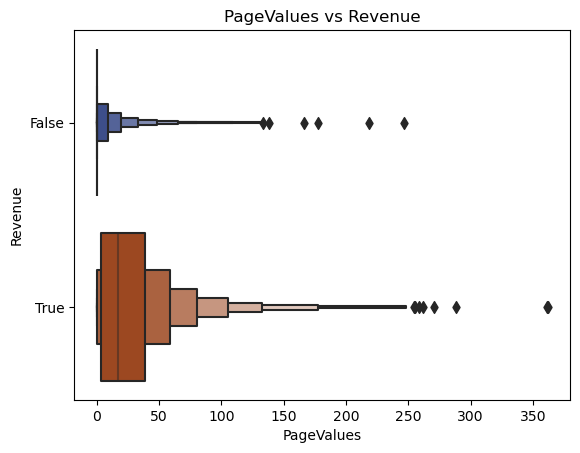

In [12]:
# plotting to visualize distribution
sns.boxenplot(df['PageValues'], df['Revenue'], palette = 'dark', orient='h')
plt.title('PageValues vs Revenue')
plt.xlabel('PageValues')
plt.ylabel('Revenue')
plt.show()

####  VisitorType against Revenue

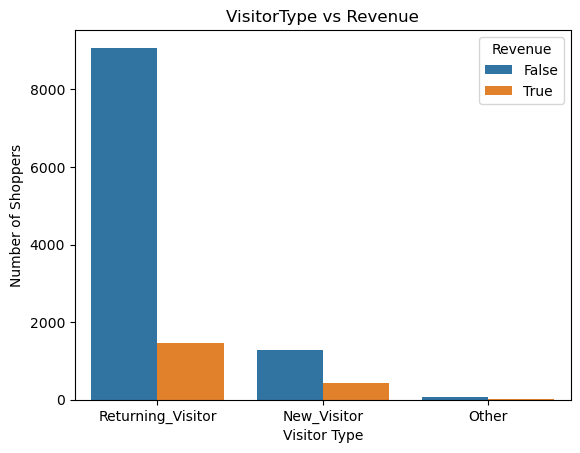

In [13]:
# plotting to visualize distribution
sns.countplot(x=df['VisitorType'], hue=df['Revenue'])
plt.title('VisitorType vs Revenue')
plt.xlabel('Visitor Type')
plt.ylabel('Number of Shoppers')
plt.show()

#### BiVariate Analysis - Summary and Observation

1. Duration spent on admin page is even distributed. Presence of outliers in the False category might suggest that the longer time spent by shoppers trying to sign in, the higher their chances of not making a purchase. This will be important in the redesign of the adminpage to make it simpler.
2. Duration spent on product page is even distributed. Presence of outliers in the False category might suggest that the longer time spent by shoppers on a product page, the higher their chances of not making a purchase.
3. Bounce rate can be seen in both purchase and non-purchase outcomes. Presence of many outliers in the False category might suggest that an increasing number of bounces will ultimately, increase the chances of not making a purchase.
4. Page Values can be seen in both purchase and non-purchase outcomes. Presence of many outliers in the True (purchase) category might suggest that the more value a page possesses, the likelyhood that a purchase will be made.
5. In general, returning customers make more purchase than other types of customers. In a more specific review though, there is a higher chance of new visitors making a purchase than other visitor types.

These can be used to provides sales and retention with more insight into customer behaviour and can help in improving sales across board using targeted promo and campaigns aimed at trying to any specific category.

### Feature Selection
#### Label Encoding
In order to homogenize all columns for correct classification, the data is pre-processed further by label encoding. this is done to convert all categorical data into binary data for easy reading by the analysis.

In [14]:
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label encoder and return encoded label
df["VisitorType"] = le.fit_transform(df["VisitorType"])
df["Month"] = le.fit_transform(df["Month"])
df["Revenue"] = le.fit_transform(df["Revenue"])
df["Weekend"] = le.fit_transform(df["Weekend"])
df.head()

# 0 is false, 1 is true

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


#### Correlation Analysis
We now seek to determine the independency of the features so as to eliminate repetition and assumption. Pearson Correlation matrix was used and correlation threshold was set at 0.60

<AxesSubplot:>

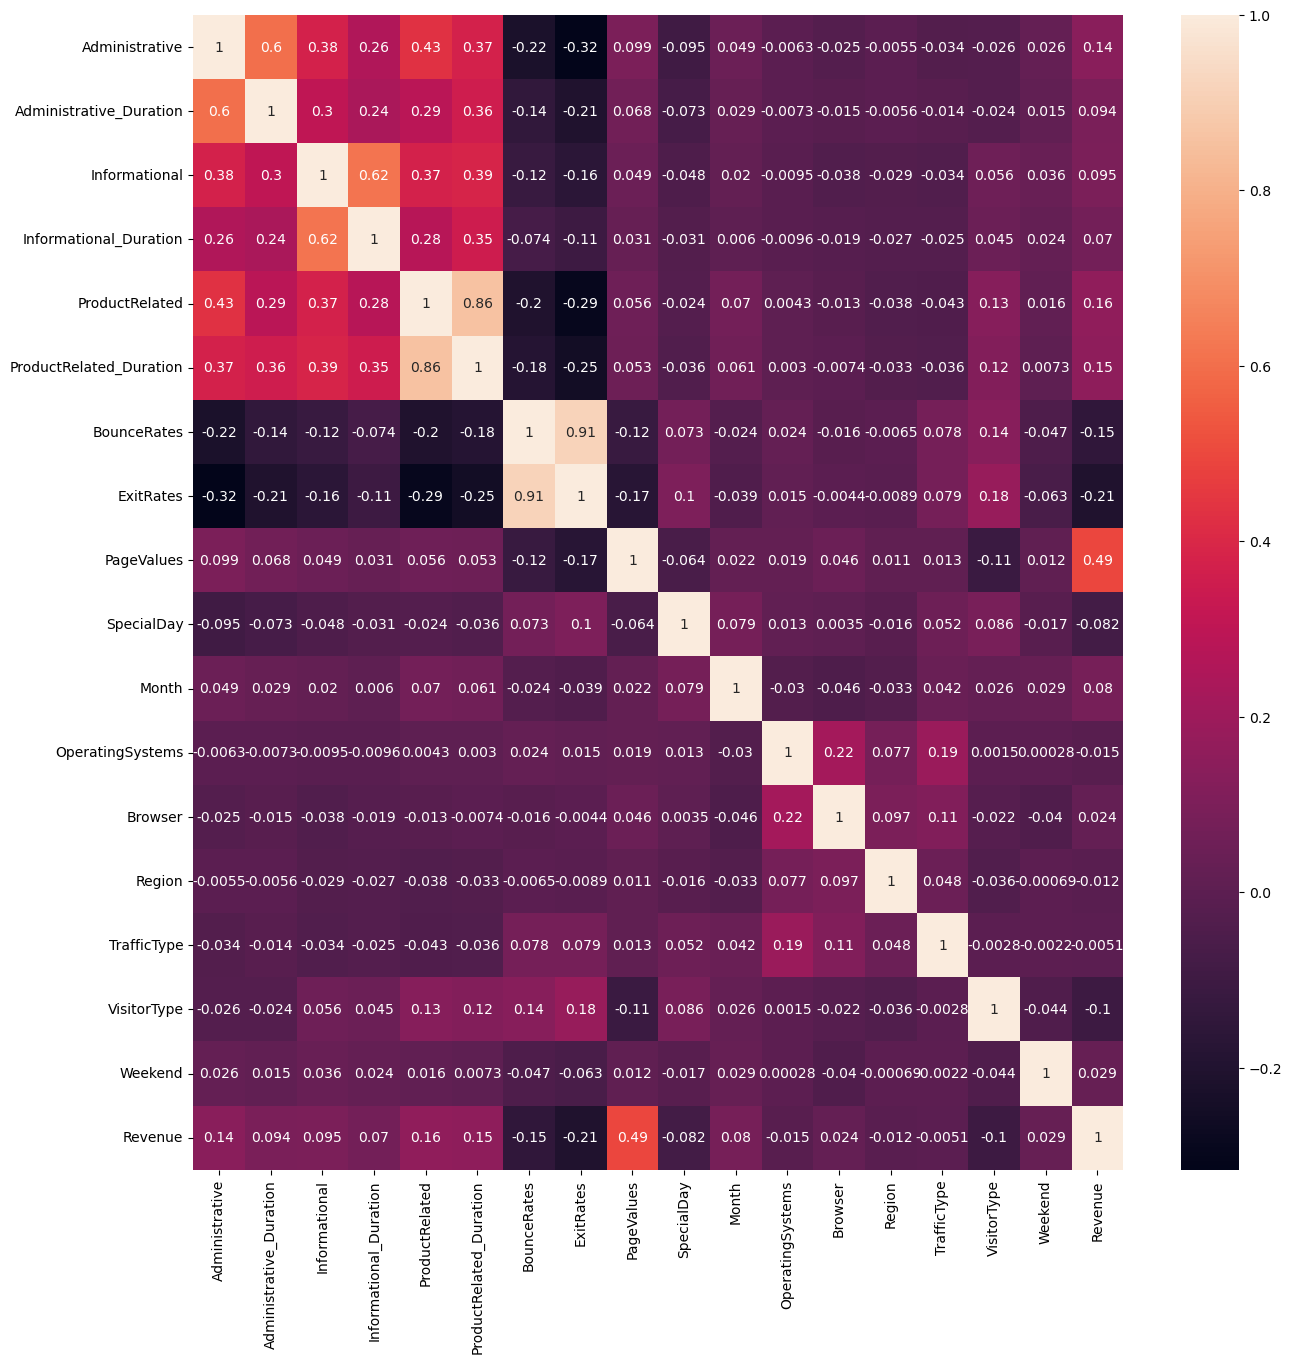

In [15]:
Var_Corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

From the correlation matrix, there is high correlation between administrative data (both duration and actual), Information, Product Related, and Rates(Exit and Bounce). To avoid multi-colinearity that exists between the features, we eliminate the feature with more correlation to revenue

<AxesSubplot:>

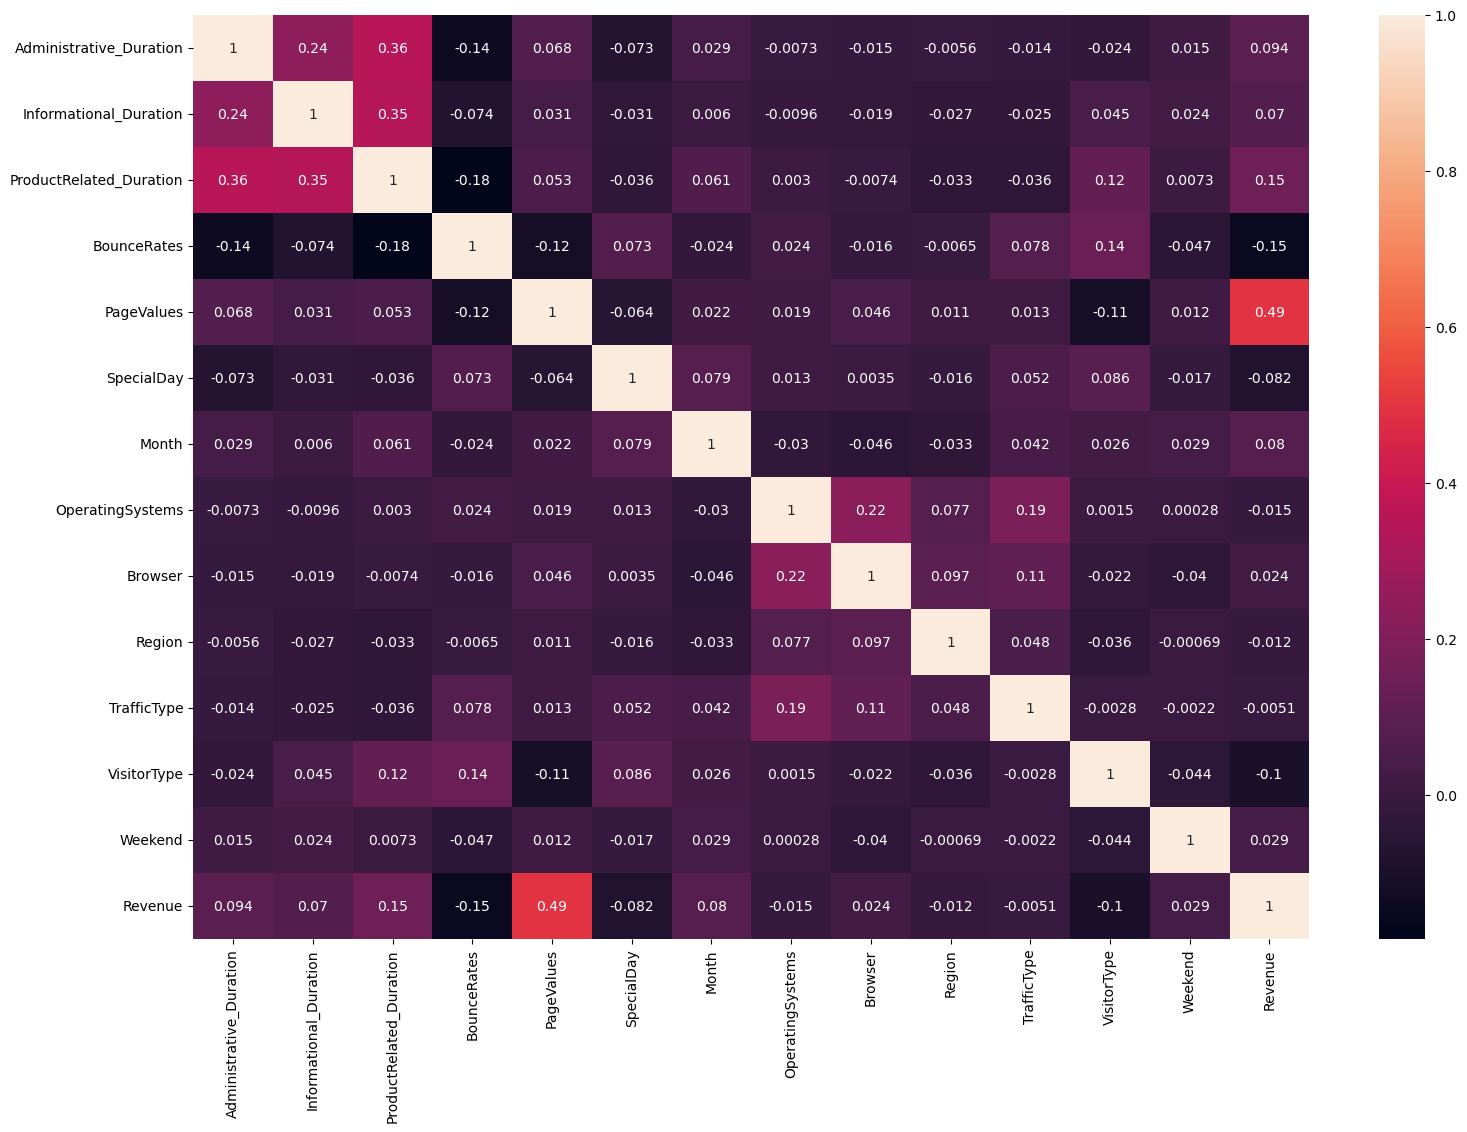

In [16]:
df = df.drop(['ProductRelated', 'Administrative', 'Informational', 'ExitRates'], axis=1, inplace=False)

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True)

### Data Splitting
Next step is to split our data into a train, validation and test set. From earlier visulaizations, we can see that the outcomes were imbalanced and the data contained outliers. Thus in order to avoid bias and inaccuracies as a result of this, we are going to scale the dataset (to account for outliers) and oversample the train data as well to account for the imbalance and prevent bias in training.

In [17]:
# create train, validation and test datasets
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

# scale data
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]]
    
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(df)
    
    if oversample:
        ros = RandomOverSampler()  # takes more of the less class create samples to match
        x, y = ros.fit_resample(x, y)
    data = (x, y) #stack arrays horizontally
    
    return data, x, y

In [18]:
train, x_train, y_train = scale_dataset(train, oversample=True)
train, x_valid, y_valid = scale_dataset(valid, oversample=False)
train, x_test, y_test = scale_dataset(test, oversample=False)

# confirming split

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_valid :", x_valid.shape)
print("Shape of y_valid :", y_valid.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (12424, 13)
Shape of y_train : (12424,)
Shape of x_valid : (2466, 13)
Shape of y_valid : (2466,)
Shape of x_test : (2466, 13)
Shape of y_test : (2466,)


## MODELLING

### K Nearest Neighbour

In [19]:
# model definition and training
knn_model = KNeighborsClassifier()
# calculate model accuracy with difference values of k/ determining no of K
mean_accuracy = np.zeros(10)
for i in range(1,11):
    #train model and predict
    knn_model = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    yhat = knn_model.predict(x_test)
    mean_accuracy[i-1] = metrics.accuracy_score(y_test, yhat)
    

mean_accuracy

array([0.8406326 , 0.84184915, 0.80129765, 0.80454177, 0.76074615,
       0.77412814, 0.74452555, 0.76926196, 0.74209246, 0.76926196])

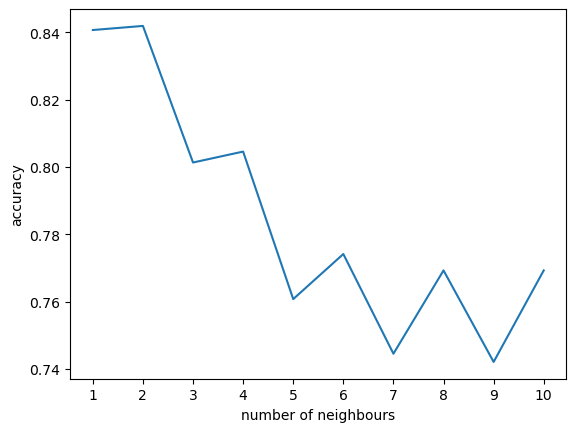

In [20]:
# plotting a graph to visualise
loc = np.arange(1, 11, step=1.0)
plt.plot(range(1,11), mean_accuracy)
plt.xticks(loc)
plt.xlabel('number of neighbours')
plt.ylabel('accuracy')
plt.show()

from above graph, the best k neighbour to use is 2 closely followed by 1

Train Accuracy:  0.9988731487443657
Valid Accuracy:  0.8304947283049473
Test Accuracy:  0.8418491484184915
recall score: 0.40625
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2114
           1       0.44      0.41      0.42       352

    accuracy                           0.84      2466
   macro avg       0.67      0.66      0.67      2466
weighted avg       0.84      0.84      0.84      2466



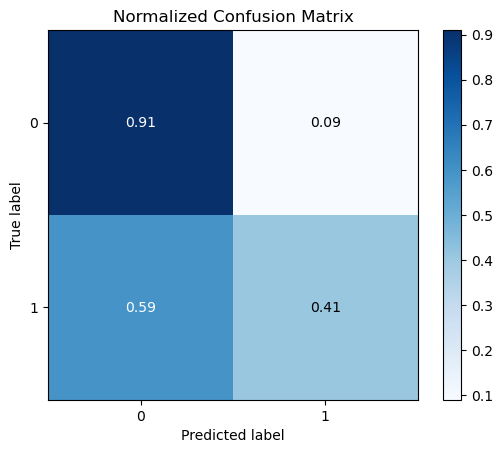

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(x_train, y_train)

knn_y_pred = knn_model.predict(x_test)

# evaluating the model
print("Train Accuracy: ", knn_model.score(x_train, y_train))
print("Valid Accuracy: ", knn_model.score(x_valid, y_valid))
print("Test Accuracy: ", knn_model.score(x_test, y_test))

# recall score
knn_recall = recall_score(y_test, knn_y_pred)
print("recall score:", knn_recall)
# Confusion Matrix
knn_confusion_m = skplt.metrics.plot_confusion_matrix(y_test, knn_y_pred, normalize=True)


# Classification report
print(classification_report(y_test, knn_y_pred))

#### Obeservation
- KNN model gives a training accuracy of 99.9% and test accuracy of 84%.
- Confusion matrix report shows that true positives are good but there is also a fairly high value of False negatives.

### Naive Bayes

Train Accuracy:  0.7435608499678042
Valid Accuracy:  0.8223844282238443
Test Accuracy:  0.8231954582319546
recall score: 0.6420454545454546
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      2114
           1       0.42      0.64      0.51       352

    accuracy                           0.82      2466
   macro avg       0.68      0.75      0.70      2466
weighted avg       0.86      0.82      0.84      2466



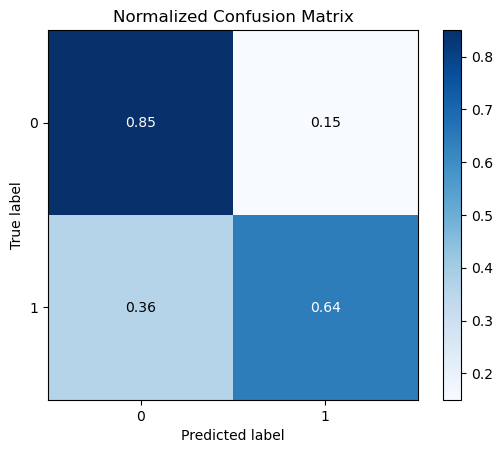

In [22]:
# model definition and training
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_y_pred = nb_model.predict(x_test)

# evaluating the model
print("Train Accuracy: ", nb_model.score(x_train, y_train))
print("Valid Accuracy: ", nb_model.score(x_valid, y_valid))
print("Test Accuracy: ", nb_model.score(x_test, y_test))

# recall score
nb_recall = recall_score(y_test, nb_y_pred)
print("recall score:", nb_recall)
# Confusion Matrix
nb_confusion_m = skplt.metrics.plot_confusion_matrix(y_test, nb_y_pred, normalize=True)

# Classification report
print(classification_report(y_test, nb_y_pred))

#### Observation
- Naive Bayes model gives a training accuracy of 74% and test accuracy of 82%.
- Confusion matrix report shows True Positive values are good but True Negative figures are averagely good.

### Logistic Regression

Train Accuracy:  0.8134256278171281
Valid Accuracy:  0.8779399837793999
Test Accuracy:  0.8686131386861314
recall score: 0.7244318181818182
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2114
           1       0.53      0.72      0.61       352

    accuracy                           0.87      2466
   macro avg       0.74      0.81      0.77      2466
weighted avg       0.89      0.87      0.88      2466



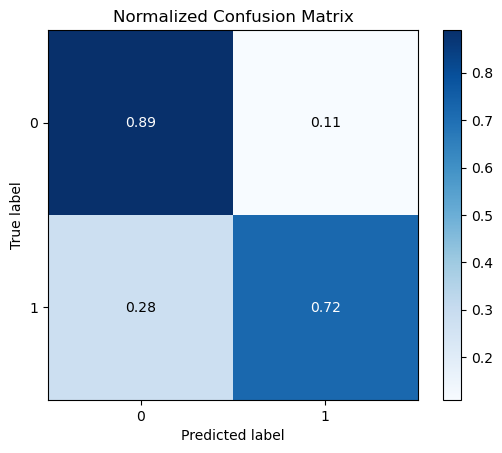

In [23]:
# Model definition and training
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)
lg_y_pred = lg_model.predict(x_test)

# evaluating the model
print("Train Accuracy: ", lg_model.score(x_train, y_train))
print("Valid Accuracy: ", lg_model.score(x_valid, y_valid))
print("Test Accuracy: ", lg_model.score(x_test, y_test))

# recall score
lg_recall = recall_score(y_test, lg_y_pred)
print("recall score:", lg_recall)

# Confusion Matrix
lg_confusion_m = skplt.metrics.plot_confusion_matrix(y_test, lg_y_pred, normalize=True)

# Classification report
print(classification_report(y_test, lg_y_pred))

#### Observation
- Logistic Regression model gives a training accuracy of 81% and test accuracy of 87%.
- Confusion Matrix report shows both True Positive and True Negative values are good.

### Support vector machine

Train Accuracy:  0.7198164842240824
Valid Accuracy:  0.6792376317923763
Test Accuracy:  0.6788321167883211
recall score: 0.7613636363636364
              precision    recall  f1-score   support

           0       0.94      0.67      0.78      2114
           1       0.27      0.76      0.40       352

    accuracy                           0.68      2466
   macro avg       0.61      0.71      0.59      2466
weighted avg       0.85      0.68      0.73      2466



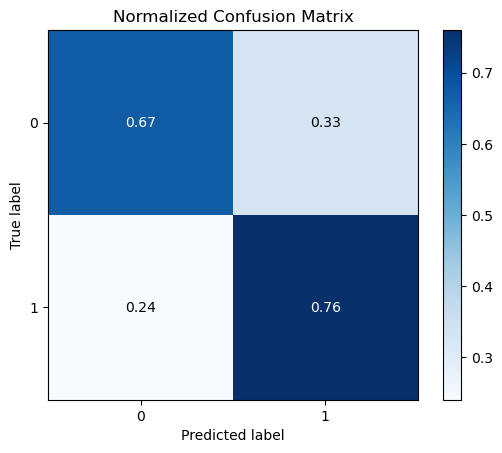

In [24]:
# Model definition and training
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)
svm_y_pred = svm_model.predict(x_test)

# evaluating the model
print("Train Accuracy: ", svm_model.score(x_train, y_train))
print("Valid Accuracy: ", svm_model.score(x_valid, y_valid))
print("Test Accuracy: ", svm_model.score(x_test, y_test))

# recall score
svm_recall = recall_score(y_test, svm_y_pred)
print("recall score:", svm_recall)
# Confusion Matrix
svm_confusion_m = skplt.metrics.plot_confusion_matrix(y_test, svm_y_pred, normalize=True)

# Classification report
print(classification_report(y_test, svm_y_pred))

#### Observation
- Support Vector model gives a training accuracy of 72% and test accuracy of 68%.
- Confusion Matrix report shows Both True Positive and True Negative values are fairly good.
- Based on default parameters, this model is not suitable for this dataset. Better results can be gotten through hyper parameter tuning.

### DecisionTree

Train Accuracy:  1.0
Valid Accuracy:  0.8536090835360909
Test Accuracy:  0.8454987834549879
recall score: 0.5142045454545454
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2114
           1       0.46      0.51      0.49       352

    accuracy                           0.85      2466
   macro avg       0.69      0.71      0.70      2466
weighted avg       0.85      0.85      0.85      2466



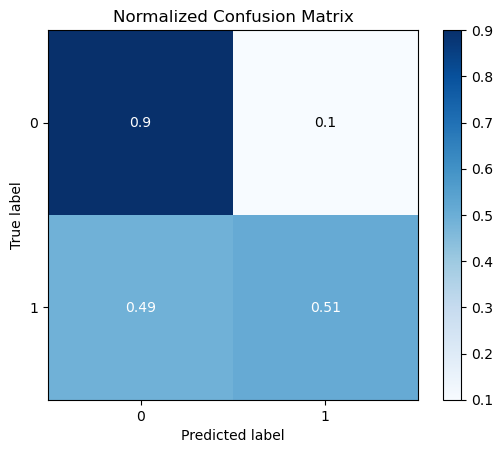

In [25]:
# Model definition and training
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(x_train, y_train)
dt_y_pred = dt_model.predict(x_test)

# evaluating the model
print("Train Accuracy: ", dt_model.score(x_train, y_train))
print("Valid Accuracy: ", dt_model.score(x_valid, y_valid))
print("Test Accuracy: ", dt_model.score(x_test, y_test))

# recall score
dt_recall = recall_score(y_test, dt_y_pred)
print("recall score:", dt_recall)
# Confusion Matrix
dt_confusion_m = skplt.metrics.plot_confusion_matrix(y_test, dt_y_pred, normalize=True)

# Classification report
print(classification_report(y_test, dt_y_pred))

#### Observation
- Decision tree model gives a training accuracy of 100% and test accuracy of 85%.
- From confusion matrix report, True Positive values are good but True Negative values just slightly good.

### Extreme Gradient Boosting

Train Accuracy:  0.9897778493238892
Valid Accuracy:  0.8819951338199513
Test Accuracy:  0.8718572587185726
recall score: 0.6960227272727273
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2114
           1       0.54      0.70      0.61       352

    accuracy                           0.87      2466
   macro avg       0.74      0.80      0.77      2466
weighted avg       0.89      0.87      0.88      2466



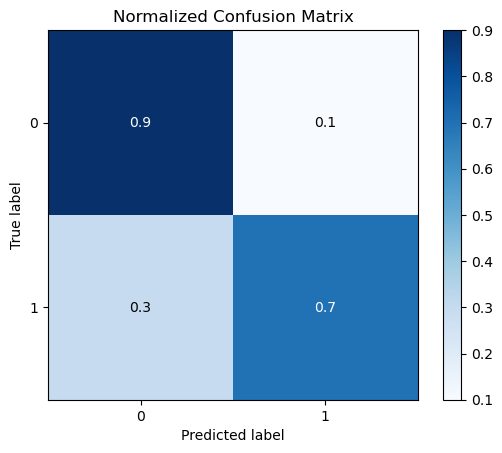

In [26]:
# Model definition and training
gb_model = XGBClassifier()
gb_model = gb_model.fit(x_train,y_train)
gb_y_pred = gb_model.predict(x_test)

# evaluating the model
print("Train Accuracy: ", gb_model.score(x_train, y_train))
print("Valid Accuracy: ", gb_model.score(x_valid, y_valid))
print("Test Accuracy: ", gb_model.score(x_test, y_test))

# recall score
gb_recall = recall_score(y_test, gb_y_pred)
print("recall score:", gb_recall)
# Confusion Matrix
gb_confusion_m = skplt.metrics.plot_confusion_matrix(y_test, gb_y_pred, normalize=True)

# Classification report
print(classification_report(y_test, gb_y_pred))

#### Observation
- Gradient Boost model gives a training accuracy of 99% and test accuracy of 87%.
- from confusion matrix report, True Postive values are strongly good and True Negative values are fairly good.

### Random Forest

Train Accuracy:  1.0
Valid Accuracy:  0.8868613138686131
Test Accuracy:  0.894566098945661
recall score: 0.6761363636363636
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2114
           1       0.62      0.68      0.65       352

    accuracy                           0.89      2466
   macro avg       0.78      0.80      0.79      2466
weighted avg       0.90      0.89      0.90      2466



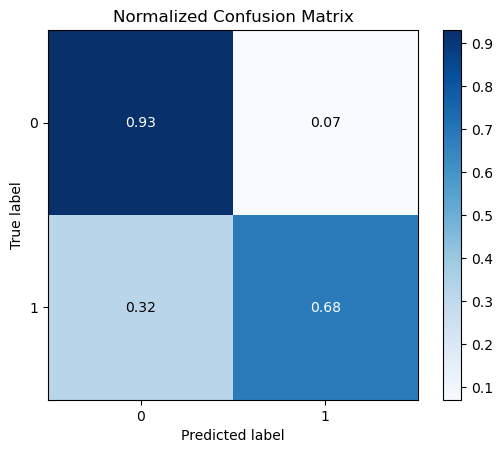

In [27]:
# Model definition and training
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(x_train,y_train)
rf_y_pred = rf_model.predict(x_test)

# evaluating the model
print("Train Accuracy: ", rf_model.score(x_train, y_train))
print("Valid Accuracy: ", rf_model.score(x_valid, y_valid))
print("Test Accuracy: ", rf_model.score(x_test, y_test))

# recall score
rf_recall = recall_score(y_test, rf_y_pred)
print("recall score:", rf_recall)
# Confusion Matrix
rf_confusion_m = skplt.metrics.plot_confusion_matrix(y_test, rf_y_pred, normalize=True)

# Classification report
print(classification_report(y_test, rf_y_pred))

#### Observation
- Random Forest model gives a training accuracy of 100% and test accuracy of 89%.
- True Positive values are strongly good and True Negative values are fair.


In [28]:
# Model Summary

#give model report in dataframe
def model_report(model,train_x,train_y,test_x,test_y,name):
    model.fit(train_x,train_y)
    predictions  = model.predict(test_x)
    accuracy     = accuracy_score(test_y,predictions)
    recallscore  = recall_score(test_y,predictions)
    precision    = precision_score(test_y,predictions)
    f1score      = f1_score(test_y,predictions)
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score]
                      })
    return df

# outline models
model1 = model_report(knn_model,x_train,y_train,x_test,y_test, "KNN")
model2 = model_report(nb_model,x_train,y_train,x_test,y_test, "Naive-Bayes")
model3 = model_report(lg_model,x_train,y_train,x_test,y_test, "Logistic Regression")
model4 = model_report(svm_model,x_train,y_train,x_test,y_test, "SVM")
model5 = model_report(dt_model,x_train,y_train,x_test,y_test, "Decision Trees")
model6 = model_report(gb_model,x_train,y_train,x_test,y_test, "Gradient Boost")
model7 = model_report(rf_model,x_train,y_train,x_test,y_test, "Random Forest")

# Concat models
model_all = pd.concat([model1,model2,model3,model4,model5,model6,model7],axis = 0).reset_index()
model_all = model_all.drop(columns = "index",axis =1)

model_all

,Model,Accuracy_score,Recall_score,Precision,f1_score
0,KNN,0.841849,0.406250,0.441358,0.423077
1,Naive-Bayes,0.823195,0.642045,0.421642,0.509009
2,Logistic Regression,0.868613,0.724432,0.529046,0.611511
3,SVM,0.678832,0.761364,0.274590,0.403614
4,Decision Trees,0.856042,0.542614,0.496104,0.518318
5,Gradient Boost,0.871857,0.696023,0.539648,0.607940
6,Random Forest,0.892944,0.673295,0.613990,0.642276


#### Algorithm Model Observation and Summary
- The top 3 models for the dataset are Extreme Gradient Boost, Logistic Regression and Random Forest.
- Logistic regression has an accuracy of 87% with good true Positives and True Negatives.
- XGB has an accuracy of 87% and good True Positives and True Negatives.
- Random forest has an accuracy of 89% , a strong true positive value and a fair true negative value.
- SVM was the least best model to use with an accuracy of 68%


## HYPERPARAMETER TUNING
Based on our model algorithm with default parameters, Random forest was the best algorithm with an accuracy of 89% followed closely by Gradient Boosting with an accuracy of 87% and logistic regression at third with 87% accuracy. But the top two models had a high training score which may be as a result of overfitting hence i decided to hypertune the model parameters to get see if I can get a better accuracy and recall score and reduce overfitiing as well.


### RANDOMISEDSEARCHCV ON RANDOM FOREST

In [29]:
# Making set of parameters to test
para_grid = {
    'n_estimators': [int(i) for i in np.linspace(start=1, stop=100, num=5)], # any 5 numbers between 1 and 100
    'max_features': ['auto','sqrt','log2'],
    'criterion': ['entropy','gini'],
    'max_depth': [3, 5, 7, 9]
}
cv = StratifiedKFold()
# running
rscv = RandomizedSearchCV(estimator=rf_model, param_distributions=para_grid, n_iter=100, cv=cv, verbose=0, n_jobs=-1)

#training to find best parameters
rscv.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [3, 5, 7, 9],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [1, 25, 50, 75, 100]})

In [30]:
# getting the best parameters
rscv.best_params_

{'n_estimators': 100,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'gini'}

Train Accuracy:  0.9070347714101739
Valid Accuracy:  0.8759124087591241
Test Accuracy:  0.8686131386861314
recall score: 0.8238636363636364
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2114
           1       0.53      0.82      0.64       352

    accuracy                           0.87      2466
   macro avg       0.75      0.85      0.78      2466
weighted avg       0.90      0.87      0.88      2466



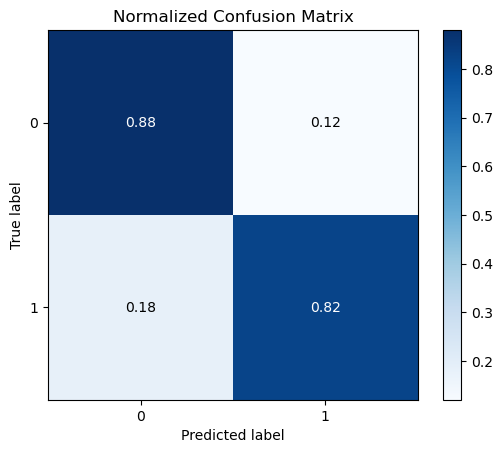

In [40]:
# train model with best parameters found
optimized_rf_model = RandomForestClassifier(criterion='gini', n_estimators=100, max_features='log2', max_depth=9)
optimized_rf_model.fit(x_train, y_train)
optimized_rf_y_pred = optimized_rf_model.predict(x_test)

# evaluating the model
print("Train Accuracy: ", optimized_rf_model.score(x_train, y_train))
print("Valid Accuracy: ", optimized_rf_model.score(x_valid, y_valid))
print("Test Accuracy: ", optimized_rf_model.score(x_test, y_test))

# recall score
opt_rf_recall = recall_score(y_test, optimized_rf_y_pred)
print("recall score:", opt_rf_recall)
# Confusion Matrix
optimized_rf_confusion_m = skplt.metrics.plot_confusion_matrix(y_test, optimized_rf_y_pred, normalize=True)

# Classification report
print(classification_report(y_test, optimized_rf_y_pred))

#### Observation
- Training accuracy is now 91% effectively reducing bias and overfitting.
- Test Acuracy is now 87%.
- Confusion matrix report also shows and improvement on the false negative value.
- recall score is 82%
- Also, number of estimators kept crashin once above 100 (might be a limitation). 

### HYPERPARAMETER TUNING FOR GRADIENT BOOST using GRIDSEARCH

In [32]:
# Making set of parameters to test
param_grid = {
    'n_estimators': [int(i) for i in np.linspace(start=1, stop=100, num=5)], # any 5 numbers between 1 and 100
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': ['auto','sqrt','log2'],
    'criterion': ['friedman_mse', 'squared_error']
}
cv = StratifiedKFold()

# running
gscv = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=cv, verbose=0, n_jobs=-1)

#training to find best parameters
gscv.fit(x_train, y_train)

[01:31:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion", "max_features" } are not used.



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [33]:
# getting the best parameters
gscv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'max_features': 'auto',
 'n_estimators': 100}

[01:31:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion", "max_features" } are not used.

Train Accuracy:  0.9389085640695428
Valid Accuracy:  0.8726682887266829
Test Accuracy:  0.8714517437145174
recall score: 0.8011363636363636
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2114
           1       0.53      0.80      0.64       352

    accuracy                           0.87      2466
   macro avg       0.75      0.84      0.78      2466
weighted avg       0.90      0.87      0.88      2466



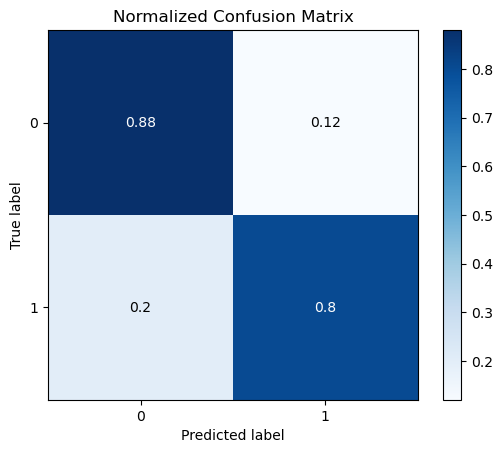

In [34]:
# train model with best parameters found
optimized_gb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, criterion='friedman_mse', max_features='auto')
optimized_gb_model.fit(x_train, y_train)
optimized_gb_y_pred = optimized_gb_model.predict(x_test)

# evaluating the model
print("Train Accuracy: ", optimized_gb_model.score(x_train, y_train))
print("Valid Accuracy: ", optimized_gb_model.score(x_valid, y_valid))
print("Test Accuracy: ", optimized_gb_model.score(x_test, y_test))

# recall score
opt_gb_recall = recall_score(y_test, optimized_gb_y_pred)
print("recall score:", opt_gb_recall)
# Confusion Matrix
optimized_gb_confusion_m = skplt.metrics.plot_confusion_matrix(y_test, optimized_gb_y_pred, normalize=True)

# Classification report
print(classification_report(y_test, optimized_gb_y_pred))

#### Observation
- Training accuracy is now 94% reducing bias and overfitting.
- Test Acuracy is now 87%.
- recall score is 80%.
- Point of note, the tuning for xgboost took very long when subsample and maxdepth parameters were to be defined.

### HYPERPARAMETER TUNING FOR LOGISTIC REGRESSION using GRIDSEARCH

In [35]:
# Making set of parameters to test
grid = {
    'solver': ['sag', 'saga', 'liblinear'],
    'C': [0.01, 0.1, 1.0, 10, 100],
    'penalty': ['l2','l1','elasticnet']
}
cv = StratifiedKFold()

# running
lgscv = GridSearchCV(estimator=lg_model, param_grid=grid, cv=cv, verbose=0, n_jobs=-1)

#training to find best parameters
lgscv.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'solver': ['sag', 'saga', 'liblinear']})

In [36]:
# getting the best parameters
lgscv.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Train Accuracy:  0.8188989053444945
Valid Accuracy:  0.8771289537712895
Test Accuracy:  0.8698296836982968
recall score: 0.7215909090909091
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2114
           1       0.53      0.72      0.61       352

    accuracy                           0.87      2466
   macro avg       0.74      0.81      0.77      2466
weighted avg       0.89      0.87      0.88      2466



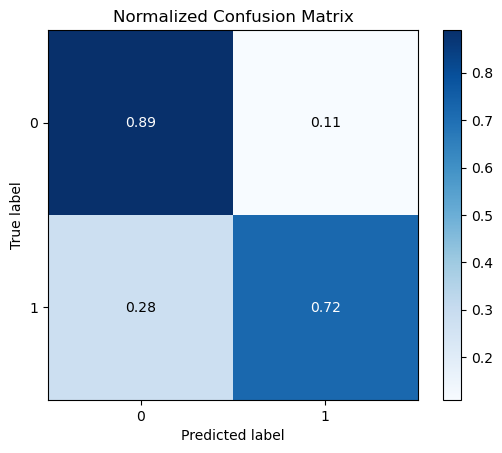

In [37]:
# train model with best parameters found
optimized_lg_model = LogisticRegression(C=10, penalty='l1', solver='liblinear')
optimized_lg_model.fit(x_train, y_train)
optimized_lg_y_pred = optimized_lg_model.predict(x_test)

# evaluating the model
print("Train Accuracy: ", optimized_lg_model.score(x_train, y_train))
print("Valid Accuracy: ", optimized_lg_model.score(x_valid, y_valid))
print("Test Accuracy: ", optimized_lg_model.score(x_test, y_test))

# recall score
opt_lg_recall = recall_score(y_test, optimized_lg_y_pred)
print("recall score:", opt_lg_recall)
# Confusion Matrix
optimized_lg_confusion_m = skplt.metrics.plot_confusion_matrix(y_test, optimized_lg_y_pred, normalize=True)

# Classification report
print(classification_report(y_test, optimized_lg_y_pred))

#### Observation
- Training accuracy is now 81% reducing bias and overfitting.
- Test Acuracy is now 87%.
- recall score is 75%.

#### Hyperparameter Tuning Summary
- XGBOOST had a test accuracy of 87.11% approximately and recall score of 80% making it the best by just a few points in accuracy score. 
- Logistic regression had a test accuracy of 86.98% and accuracy score of 72%
- Random Forest model had a test accuracy with 86.86 and recall score of 82% 

Thus, with hyper parameter tuning, Random Forest was slightly edged by Extreme Gradient Boosting as the best algorithm to use to determine online shopper prediction.

## FEATURE IMPORTANCE USING SHAP
SHAP allows us identify features in our dataset which are most important in the model predicting an outcome.

In [41]:
# define parameters
df1 = df.copy()
sample_df = pd.DataFrame(x_train, columns = [df1.columns[:-1]])
sample_df1 = sample_df.copy().sample(n=100, random_state=10)
explainer = shap.TreeExplainer(optimized_gb_model)
shap_values = explainer.shap_values(sample_df1)
shap_values = pd.DataFrame(shap_values, columns = [df1.columns[:-1]])
print(type(shap_values))
#visualize first prediction

<class 'pandas.core.frame.DataFrame'>


In [42]:
# Visualise first prediction
shap.plots.force(explainer.expected_value, shap_values.values[0,:], sample_df.iloc[0,:])

In [43]:
# visualizing the training set prediction
shap.plots.force(explainer.expected_value, shap_values.values, sample_df)

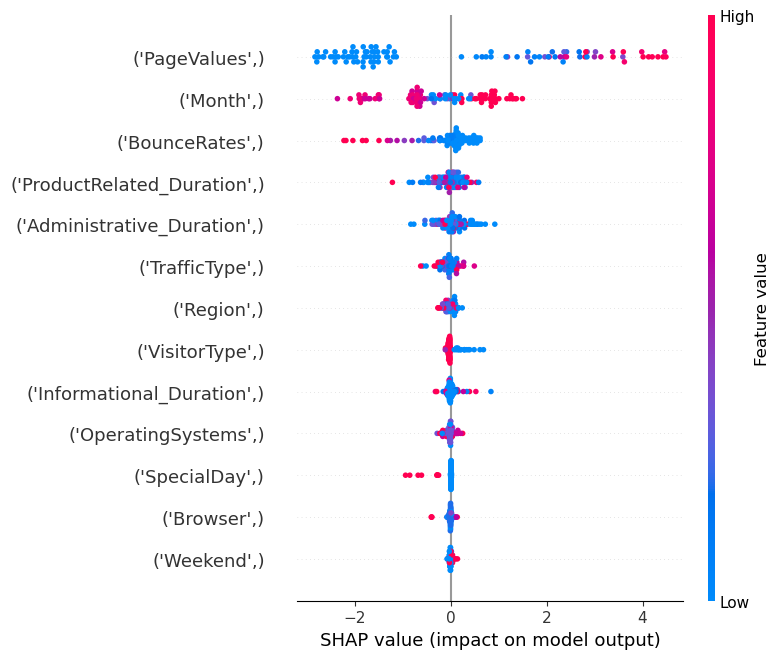

In [44]:
#summary plot
shap.summary_plot(shap_values.values, sample_df1)

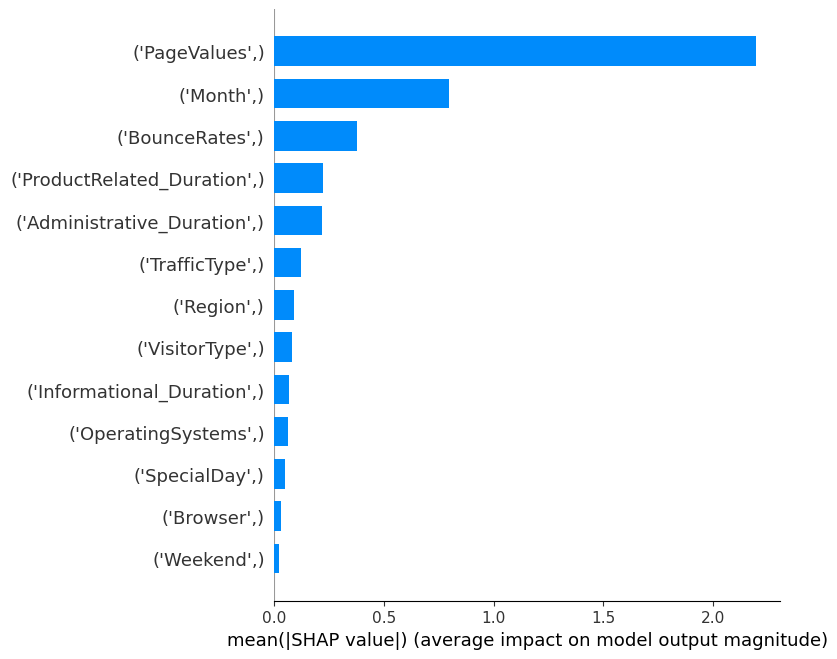

In [45]:
#summary plot
shap.summary_plot(shap_values.values, sample_df1, plot_type="bar")

#### Observation and Summary
Upon shap application on XGBOOST algorithm, the most important criterias for determining purchase online by shoppers are PageValues, Month of the year, Bounce rates and period spent on product related pages.
Hence in order to improve purchase probability, more attention should be paid to these features of the website.